# This file will create a randomForestTree model trained on the vectorized words from text
### Import libraries and then load in the dataframe object containing the dataset

In [2]:
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import pandas as pd
import joblib
import pickle 

directory = "TextDataset/merged_training.pkl"
df = pickle.load(open(directory,"rb"))
df['emotions'] = df['emotions'].replace({'joy': 'happiness'}, regex=True)
df = df[:2000]
df = df.sample(frac = 1)
df.head()

,text,emotions
30157,i was upset most of the time during my birthda...,love
25219,i feel a perverse need to make you scroll anyway,sadness
98765,i wanted her to feel the love and freedom with...,sadness
107365,i sincerely believe that every client celebrit...,happiness
110371,im back at my doctors tomorrow for the results...,sadness


## Feature extraction using tfid vectorizer (Change text to numbers)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
# feature extraction
vect = TfidfVectorizer(max_df=0.9)
xfeat = vect.fit_transform(df['text'])
x = xfeat.toarray()
x = np.array(x)
featcount = x.shape[1]
x.shape

(2000, 4811)

## Split the vectorized data and labels into train and test groups

In [17]:
from sklearn.model_selection import train_test_split
emoti = df[['emotions']]
X_train,X_test,y_train,y_test = train_test_split(x, emoti.values, test_size=0.3)
X_train.shape

(2000, 1)

# Run the model on the given X_train and y_train data

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
clf.fit(X_train, y_train)

C:\Users\mikae\AppData\Local\Temp/ipykernel_11548/402286639.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500, n_jobs=-1)

## Check model performance using different metrics
### classification report

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

       anger       0.90      0.83      0.87      2293
        fear       0.84      0.82      0.83      1863
   happiness       0.84      0.95      0.89      5498
        love       0.87      0.66      0.75      1420
     sadness       0.92      0.92      0.92      4806
    surprise       0.81      0.67      0.73       620

    accuracy                           0.87     16500
   macro avg       0.86      0.81      0.83     16500
weighted avg       0.87      0.87      0.87     16500



### Confusion matrix

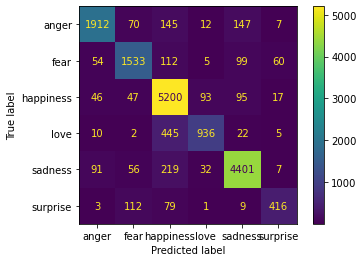

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

## Test any sentence you want against the model by putting it into vect.transform([])
### clf.predict() will return the predicted label

In [28]:
testfeat = vect.transform([''])

clf.predict(testfeat)


array(['sadness'], dtype=object)

## Save model and vectorizer if happy with performance

In [33]:
file = open('Objects/vectorizer.obj', 'wb') 
pickle.dump(vect, file)
joblib.dump(clf, "Models/TextModel.joblib")

['Models/TextModel.joblib']

### Load the saved model and vectorizer for use again without having to create and train a new model/vectorizer

In [11]:
loaded_clf = joblib.load("Models/TextModel.joblib")
file_to_read = open("Objects/vectorizer.obj", "rb")
vect = pickle.load(file_to_read)

array(['anger'], dtype=object)

### Run a prediction on the loaded model and vectorizer to make sure they saved and work

In [13]:
testfeat = vect.transform(['It makes me really angry when I have to do this'])

loaded_clf.predict(testfeat)

array(['anger'], dtype=object)